In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [7]:
data = pd.read_csv('data.csv')

In [8]:
data.columns = ["text","class"]

In [9]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
y = data["class"].values

In [11]:
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

del data

In [12]:
import gensim

In [13]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [14]:
#vocab size
len(w2v_model.wv.vocab)

#We have now represented each of 122248 words by a 100dim vector.

110688

In [15]:
#see a sample vector for random word, lets say Corona 
w2v_model["corona"]

array([ 1.00890209e-03, -1.99008791e-05, -1.24007715e-02,  2.54451334e-02,
       -3.86230238e-02, -1.35915424e-03, -1.14998000e-03,  2.46495561e-04,
        1.11890929e-02,  8.86316039e-03,  7.95417174e-04, -2.27385964e-02,
       -5.19879628e-03, -2.42456663e-02,  2.16080155e-02, -3.63147296e-02,
        4.54790033e-02, -2.93265730e-02,  5.99413514e-02, -8.03930461e-02,
        1.67803857e-02, -4.62526754e-02,  6.49676621e-02, -2.35206950e-02,
       -1.11728394e-02, -5.37333600e-02, -4.54513989e-02,  1.79062597e-02,
        3.65451764e-04, -6.73567131e-02, -2.40356792e-02,  6.25894666e-02,
        3.03251762e-02,  4.99337874e-02, -2.88199671e-02, -5.18091470e-02,
        8.87285080e-03, -1.12699224e-02, -1.00612752e-02,  4.61505465e-02,
        1.75573323e-02, -3.33363824e-02,  2.46172454e-02, -2.78929137e-02,
        9.14634988e-02, -4.53075469e-02, -7.69968098e-03, -9.48581658e-03,
       -1.41590592e-02,  8.03970359e-03, -2.88099516e-02,  2.29660701e-02,
       -9.70076537e-04,  

In [16]:
w2v_model.wv.most_similar("iran")

[('tehran', 0.8465368151664734),
 ('iranian', 0.7735916376113892),
 ('destabilizing', 0.6384572982788086),
 ('hezbollah', 0.6261587738990784),
 ('sanction', 0.5779509544372559),
 ('jcpoa', 0.5692330598831177),
 ('nuke', 0.5665336847305298),
 ('turkey', 0.5646256804466248),
 ('ankara', 0.5613735914230347),
 ('israel', 0.5593534708023071)]

In [17]:
w2v_model.wv.most_similar("fbi")

[('comey', 0.7384006381034851),
 ('cia', 0.6331489086151123),
 ('investigator', 0.5936321020126343),
 ('investigation', 0.5773916840553284),
 ('mueller', 0.5665577054023743),
 ('doj', 0.5551398992538452),
 ('classified', 0.522101640701294),
 ('nsa', 0.513917863368988),
 ('wiretap', 0.5097992420196533),
 ('probe', 0.5093430876731873)]

In [18]:
w2v_model.wv.most_similar("facebook")

[('reddit', 0.6640375256538391),
 ('instagram', 0.6495581865310669),
 ('fb', 0.6468603610992432),
 ('gofundme', 0.6439164280891418),
 ('google', 0.6190957427024841),
 ('advert', 0.6006959080696106),
 ('online', 0.5806050300598145),
 ('blog', 0.5801248550415039),
 ('linkedin', 0.5664689540863037),
 ('website', 0.5535643100738525)]

In [19]:
w2v_model.wv.most_similar("computer")

[('malware', 0.7610825300216675),
 ('laptop', 0.7521571516990662),
 ('electronic', 0.7351430654525757),
 ('software', 0.7296757102012634),
 ('hacker', 0.7105481028556824),
 ('device', 0.6972883939743042),
 ('password', 0.6678939461708069),
 ('kaspersky', 0.6670196056365967),
 ('scanning', 0.6613163352012634),
 ('server', 0.6594116687774658)]

In [20]:
#Feeding US Presidents
w2v_model.wv.most_similar(positive=["biden","trump","obama", "clinton"])
#First was Bush

[('bush', 0.5362132787704468),
 ('macron', 0.5202465653419495),
 ('cruz', 0.5164587497711182),
 ('hillary', 0.5115461349487305),
 ('rubio', 0.47204822301864624),
 ('elect', 0.4702662229537964),
 ('amateur', 0.4649658799171448),
 ('conway', 0.4574367105960846),
 ('penny', 0.453914999961853),
 ('putin', 0.45359718799591064)]

In [21]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [22]:
# lets check the first 10 words of first news
#every word has been represented with a number
X[0][:10]

[382, 367, 13376, 2484, 4556, 1272, 4339, 125, 382, 367]

In [23]:
#Lets check few word to numerical replesentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break    

trump -> 1
said -> 2
state -> 3
president -> 4
would -> 5
people -> 6
year -> 7
republican -> 8
one -> 9
news -> 10


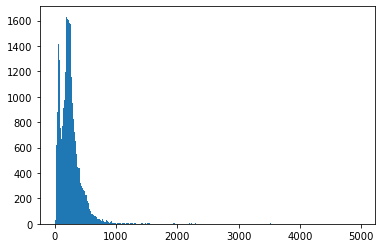

In [24]:
# For determining size of input...

# Making histogram for no of words in news shows that most news article are under 700 words.
# Lets keep each news small and truncate all news to 700 while tokenizing
plt.hist([len(x) for x in X], bins=500)
plt.show()

# Its heavily skewed. There are news with 5000 words? Lets truncate these outliers :) 

In [25]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])
# Out of 48k news, 44k have less than 700 words

44008

In [26]:
#Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlen = 700 

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [27]:
#all news has 700 words (in numerical form now). If they had less words, they have been padded with 0
# 0 is not associated to any word, as mapping of words started from 1
# 0 will also be used later, if unknows word is encountered in test set
len(X[0])

700

In [28]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [29]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [30]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [31]:
batch_size = 256
epochs = 10
embed_size = 100

In [32]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [33]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

del embedding_vectors

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          11068900  
                                                                 
 lstm (LSTM)                 (None, 700, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,237,669
Trainable params: 168,769
Non-trainable params: 11,068,900
_________________________________________________________________


In [35]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [ ]:
history = model.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
132/132 [==============================] - 983s 7s/step - loss: 0.1515 - accuracy: 0.9435 - val_loss: 0.0828 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 2/10
132/132 [==============================] - 1006s 8s/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0090 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 3/10
132/132 [==============================] - 1017s 8s/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.0090 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 4/10
132/132 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9956
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
132/132 [==============================] - 1009s 8s/step - loss: 0.0193 - accuracy: 0.9956 - val_loss: 0.0101 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 5/10
132/132 [==============================] - 1086s 8s/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.0061 - val_accuracy: 0.9982 - lr: 5.0000e-04
Epoch 6/10
132/132 [==============================]

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
pred[:5]

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")